In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [29]:
#scale dataframe first
scaler =  StandardScaler()
cancer_df = load_breast_cancer()
df = pd.DataFrame(data = cancer_df['data'], columns = cancer_df['feature_names'])
scaled_df = scaler.fit_transform(df)

In [30]:
#a lot of features (dimensions) are present in the dataset, we have to reduce dimensions using PCA
# PCA is a technique to reduce the number of features in a dataset while retaining most of the information
scaled_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [31]:
#fit & transform the scaled data using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_df)


In [32]:
data_pca #we were able to reduce data to two dimensions

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [33]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0.5, 1.0, 'PCA of Cancer Data')

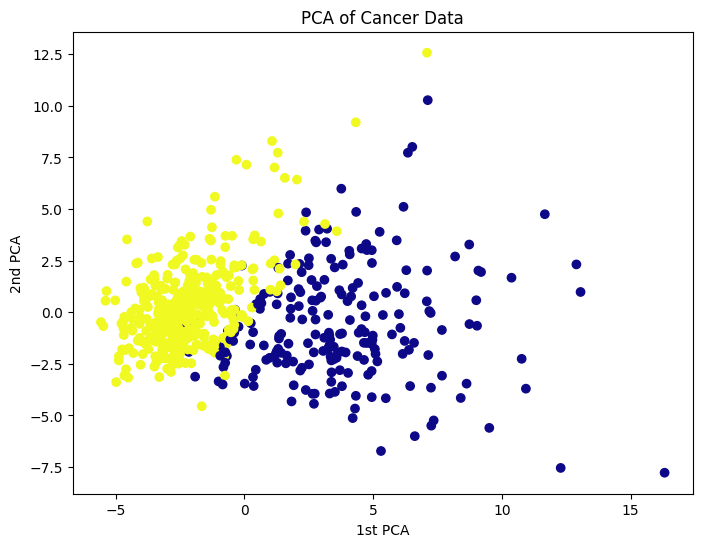

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1],c = cancer_df['target'], cmap = 'plasma')
plt.xlabel('1st PCA')
plt.ylabel('2nd PCA')
plt.title('PCA of Cancer Data')

In [35]:
df_comp = pd.DataFrame(pca.components_, index = ['PC1', 'PC2'], columns = df.columns)
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

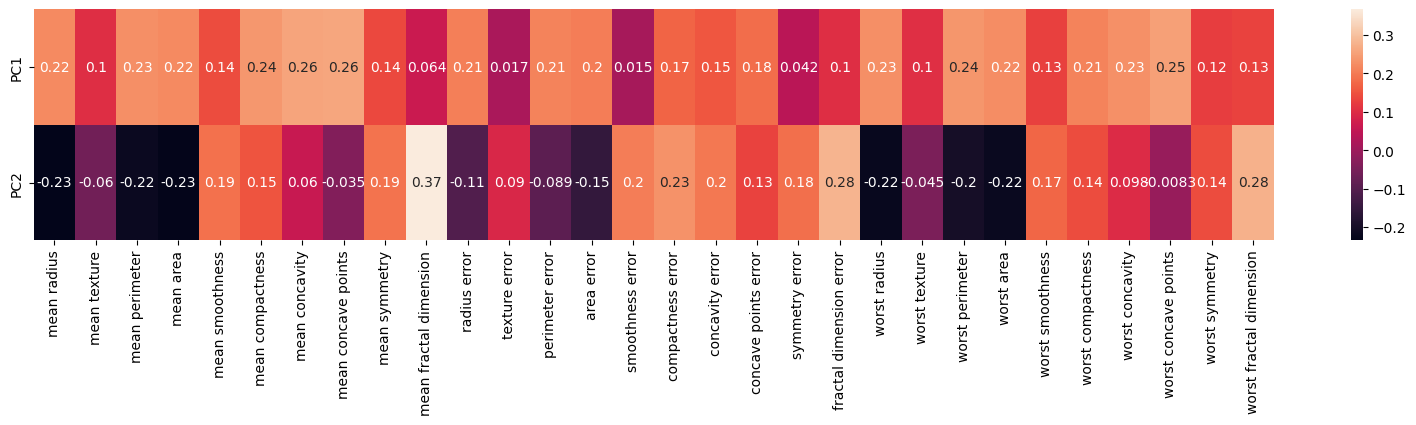

In [36]:
plt.figure(figsize = (20,3))
import seaborn as sns
sns.heatmap(df_comp, annot = True)


In [37]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [38]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

np.float64(0.6324320765155946)

In [39]:
pca_30 = PCA(n_components=30)
pca_30.fit(scaled_df)

PCA(n_components=30)

In [40]:
pca_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [41]:
np.sum(pca_30.explained_variance_ratio_)

np.float64(1.0)

In [43]:
explained_variance = []
for i in range(1,30):
    pca = PCA(n_components=i)
    pca.fit(scaled_df)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Explained Variance')

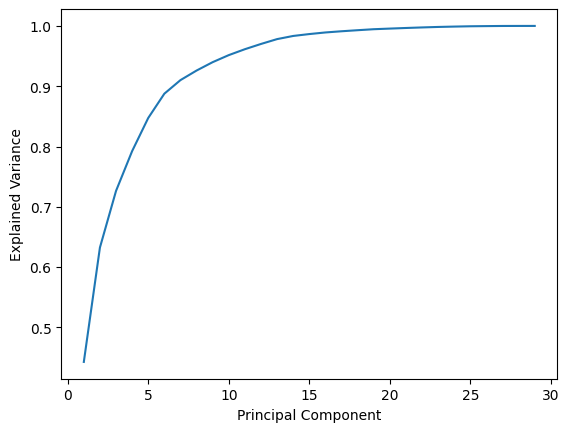

In [44]:
plt.plot(range(1,30), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')